In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox

In [7]:
df = pd.read_csv('data/clean_data.csv')

In [61]:
df.head()

,Unnamed: 0,OccupancyDateTime,PaidOccupancy,BlockfaceName,SideOfStreet,SourceElementKey,ParkingTimeLimitCategory,ParkingSpaceCount,PaidParkingArea,PaidParkingSubArea,...,Longitude,Holiday,DayOfTheWeek,Year,Month,Day,Hour,Minute,Second,MinuteOfTheDay
0,2964734,2022-03-15 12:00:00,4,REPUBLICAN ST BETWEEN TERRY AVE N AND BOREN AVE N,N,35197,120.0,8,South Lake Union,South,...,47.623268,False,1,2022,3,15,12,0,0,43200
1,3300504,2022-03-15 12:00:00,1,MERCER ST BETWEEN YALE AVE N AND EASTLAKE AVE E,S,79790,120.0,9,South Lake Union,South,...,47.624233,False,1,2022,3,15,12,0,0,43200
2,3221948,2022-03-15 12:00:00,7,8TH AVE N BETWEEN VALLEY ST AND ALOHA ST,E,8406,600.0,10,South Lake Union,North,...,47.626663,False,1,2022,3,15,12,0,0,43200
3,3279331,2022-03-15 12:00:00,7,PONTIUS AVE N BETWEEN REPUBLICAN ST AND MERCER ST,E,57550,600.0,8,South Lake Union,South,...,47.623680,False,1,2022,3,15,12,0,0,43200
4,3308229,2022-03-15 12:00:00,2,TERRY AVE N BETWEEN THOMAS ST AND HARRISON ST,E,13110,120.0,3,South Lake Union,South,...,47.621446,False,1,2022,3,15,12,0,0,43200


In [8]:
df['ParkingSpaceCount'].value_counts()

7     469775
6     380350
4     352524
8     335867
10    332149
5     299369
9     266091
3     243139
2     156537
11    149992
15    122437
13    115234
1      72295
16     48508
14     37948
19     36740
12     36146
25     18975
28     18379
23     18377
20     18375
22     18374
29     18371
21     18371
24     18370
27     18368
Name: ParkingSpaceCount, dtype: int64

In [34]:
import numpy as np
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [43]:
(df['PaidParkingSubArea'].values == '').sum()      

0

In [9]:
df.isnull().any()

Unnamed: 0                  False
OccupancyDateTime           False
PaidOccupancy               False
BlockfaceName               False
SideOfStreet                False
SourceElementKey            False
ParkingTimeLimitCategory    False
ParkingSpaceCount           False
PaidParkingArea             False
PaidParkingSubArea          False
ParkingCategory             False
Location                    False
OccupancyPercentage         False
HasAvailability             False
AvailableSpace              False
Latitude                    False
Longitude                   False
Holiday                     False
DayOfTheWeek                False
Year                        False
Month                       False
Day                         False
Hour                        False
Minute                      False
Second                      False
MinuteOfTheDay              False
dtype: bool

In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621061 entries, 0 to 3621060
Data columns (total 26 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                int64  
 1   OccupancyDateTime         object 
 2   PaidOccupancy             int64  
 3   BlockfaceName             object 
 4   SideOfStreet              object 
 5   SourceElementKey          int64  
 6   ParkingTimeLimitCategory  float64
 7   ParkingSpaceCount         int64  
 8   PaidParkingArea           object 
 9   PaidParkingSubArea        object 
 10  ParkingCategory           object 
 11  Location                  object 
 12  OccupancyPercentage       float64
 13  HasAvailability           bool   
 14  AvailableSpace            int64  
 15  Latitude                  float64
 16  Longitude                 float64
 17  Holiday                   bool   
 18  DayOfTheWeek              int64  
 19  Year                      int64  
 20  Month                   

<AxesSubplot:ylabel='HasAvailability'>

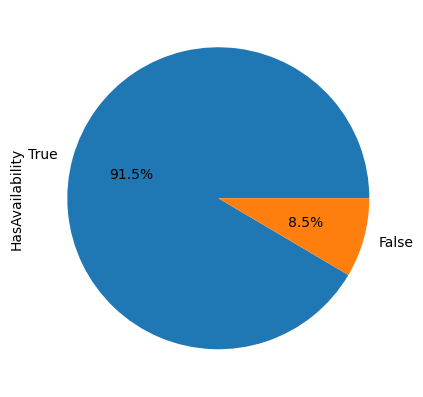

In [11]:
availability = df['HasAvailability'].value_counts()
fig = plt.figure(figsize=(5, 5), dpi= 100)
ax = plt.subplot(111)

availability.plot(kind='pie', ax=ax, autopct='%1.1f%%',
                   shadow= False, startangle=0)

imbalanced data where majority are availabel and minority aren't, need resampling

In [12]:
df_has_available = df.loc[df['HasAvailability'] == True]
df_no_available = df[df["HasAvailability"] == False]

<AxesSubplot:title={'center':'Availability by hour in 30 days excluding 24:00 - 8:00'}>

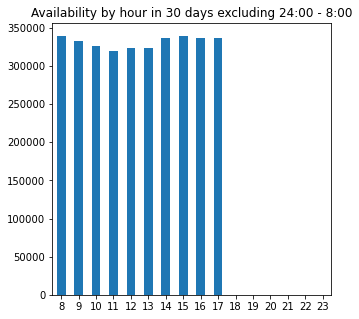

In [13]:
hour = df_has_available['Hour'].value_counts().sort_index()

hour.plot.bar(title="Availability by hour in 30 days excluding 24:00 - 8:00", rot=0,figsize=(5, 5))

<AxesSubplot:title={'center':'\n Availability by weekday in 30 days \n'}, xlabel='Weekday', ylabel='Availability count'>

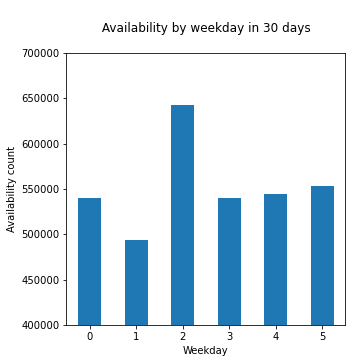

In [60]:
day = df_has_available['DayOfTheWeek'].value_counts().sort_index()
day.plot.bar(title="\n Availability by weekday in 30 days \n",
xlabel='Weekday', ylabel='Availability count', 
ylim=(400000,700000),
rot=0,figsize=(5, 5))

<AxesSubplot:title={'center':'\n Availability by hour in 30 days (excluding 18:00 - 8:00) \n'}, xlabel='Hour', ylabel='Availability count'>

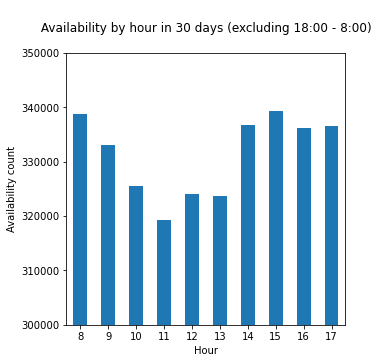

In [33]:
hour[:-6].plot.bar( xlabel='Hour', ylabel='Availability count',
    title="\n Availability by hour in 30 days (excluding 18:00 - 8:00) \n", 
    rot=0, ylim=(300000,350000), figsize=(5, 5))

In [20]:
ParkingTimeLimitCategoryAll = df['ParkingTimeLimitCategory'].value_counts().sort_index()
ParkingTimeLimitCategoryAll

30.0       15970
120.0    2224740
600.0    1380351
Name: ParkingTimeLimitCategory, dtype: int64

In [22]:
ParkingTimeLimitCategory_neg = df_no_available['ParkingTimeLimitCategory'].value_counts().sort_index()
ParkingTimeLimitCategory_neg

30.0       8312
120.0     91730
600.0    207387
Name: ParkingTimeLimitCategory, dtype: int64

<AxesSubplot:title={'center':'Occupany Percentage by Parking Time Limit Category \n'}, xlabel='Time Limit (minutes)', ylabel='Occupany Percentage'>

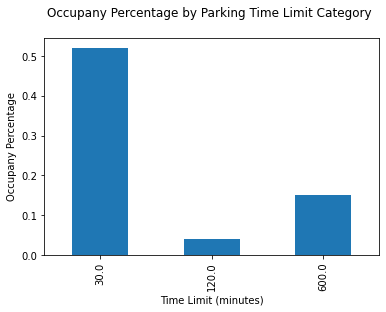

In [30]:
b = ParkingTimeLimitCategory_neg / ParkingTimeLimitCategoryAll
b.plot.bar(title="Occupany Percentage by Parking Time Limit Category \n", 
xlabel='Time Limit (minutes)', ylabel='Occupany Percentage')

<AxesSubplot:title={'center':'Availability Percentage by Parking Time Limit Category \n'}, xlabel='Time Limit (minutes)', ylabel='Avalability Percentage'>

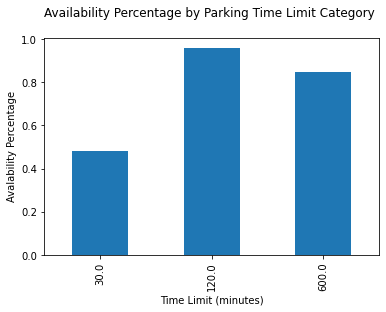

In [52]:
a.plot.bar(title="Availability Percentage by Parking Time Limit Category \n", 
xlabel='Time Limit (minutes)', ylabel='Avalability Percentage')

In [45]:
ParkingSpaceCount = df_has_available['ParkingSpaceCount'].value_counts().sort_index()
ParkingSpaceCountAll = df['ParkingSpaceCount'].value_counts().sort_index()
ParkingSpaceCount_neg = df_no_available['ParkingSpaceCount'].value_counts().sort_index()

<AxesSubplot:title={'center':'Availability Percentage by Parking Space Count \n'}, xlabel='Parking Space Count', ylabel='Avalability Percentage'>

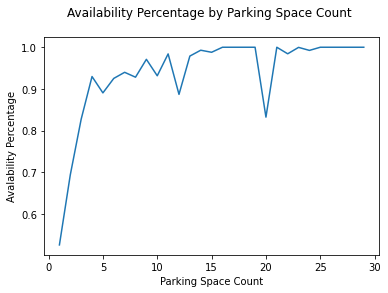

In [53]:
c = ParkingSpaceCount / ParkingSpaceCountAll
d = ParkingSpaceCount_neg / ParkingSpaceCountAll
c.plot.line(title="Availability Percentage by Parking Space Count \n", 
xlabel='Parking Space Count', ylabel='Avalability Percentage')

<AxesSubplot:>

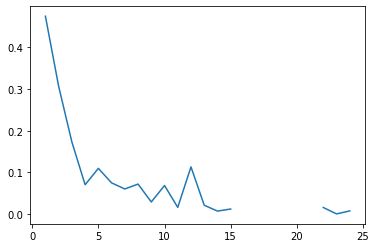

In [49]:

d.plot.line()

In [14]:
ParkingCategory = df_has_available['ParkingCategory'].value_counts().sort_index()
ParkingCategory 

Paid Parking               2876119
Restricted Parking Zone     437513
Name: ParkingCategory, dtype: int64

In [15]:
ParkingCategory_neg = df_no_available['ParkingCategory'].value_counts().sort_index()
ParkingCategory_neg

Paid Parking               304279
Restricted Parking Zone      3150
Name: ParkingCategory, dtype: int64

In [16]:
PaidParkingSubArea = df_has_available['PaidParkingSubArea'].value_counts().sort_index()
PaidParkingSubArea

North     738330
South    2575302
Name: PaidParkingSubArea, dtype: int64

In [17]:
PaidParkingSubArea_neg = df_no_available['PaidParkingSubArea'].value_counts().sort_index()
PaidParkingSubArea_neg

North    112555
South    194874
Name: PaidParkingSubArea, dtype: int64

Parking is free in Seattle on Weekend and Holidays :) How would this affect our prediction?

In [18]:
df['Holiday'].value_counts()

False    3621061
Name: Holiday, dtype: int64

In [19]:
location = df_no_available[["Location"]]
location = location.value_counts().rename_axis("loc").reset_index(name="counts")
location['strip_location'] = location['loc'].str[7:-1]
location = location.drop(columns='loc')
location[['lat', 'log']] = location.strip_location.str.split(' ',expand=True)
location = location.drop(columns='strip_location')

In [20]:
location = location[['log','lat','counts']]
location['lat'] = pd.to_numeric(location['lat'])
location['log'] = pd.to_numeric(location['log'])
points = location.to_numpy()

In [21]:
import folium
from folium import plugins

In [22]:
m1 = folium.Map(location=[47.6256, -122.3344], zoom_start=14)
plugins.HeatMap(points).add_to(m1)
# you can run this command to save the map webpage
# m1.save('data/map1.html')
m1
# if you're getting "Make this notebook trusted to load map : File -> Trust Notebook"
# switch to another browser (safari) might help

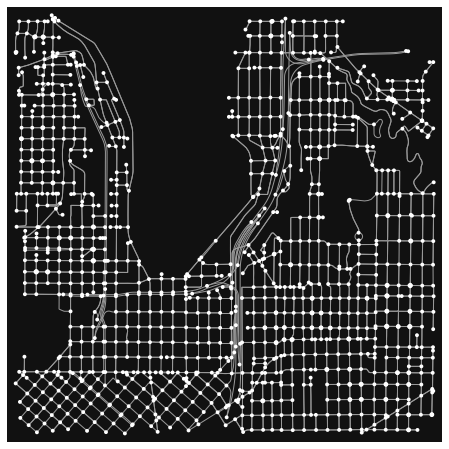

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [23]:
streets = ox.graph_from_point((47.63, -122.33), dist=1800, network_type = 'drive')
ox.plot_graph(streets)